In [1]:
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
X, y = mnist["data"], mnist["target"]
X.shape


(70000, 784)

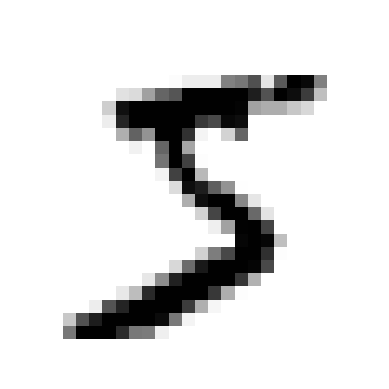

In [3]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")

plt.show()

In [4]:
y[0]

'5'

In [5]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [6]:
 y = y.astype(np.uint8)

In [7]:
y


array([5, 0, 4, ..., 4, 5, 6], dtype=uint8)

In [8]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]


In [9]:
from sklearn.neighbors import KNeighborsClassifier
y_train_large = (y_train >= 7)

In [10]:
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [11]:
 knn_clf.predict([some_digit])

array([[False,  True]])

In [12]:
from sklearn.model_selection import cross_val_predict
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)

In [13]:
from sklearn.metrics import f1_score
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.9764102655606048

In [14]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [3, 4, 5]}]

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, verbose=3)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ....n_neighbors=3, weights=uniform;, score=0.972 total time=  15.5s
[CV 2/5] END ....n_neighbors=3, weights=uniform;, score=0.971 total time=  15.8s
[CV 3/5] END ....n_neighbors=3, weights=uniform;, score=0.969 total time=  15.5s
[CV 4/5] END ....n_neighbors=3, weights=uniform;, score=0.969 total time=  16.1s
[CV 5/5] END ....n_neighbors=3, weights=uniform;, score=0.970 total time=  18.2s
[CV 1/5] END ...n_neighbors=3, weights=distance;, score=0.972 total time=  15.4s
[CV 2/5] END ...n_neighbors=3, weights=distance;, score=0.972 total time=  14.9s
[CV 3/5] END ...n_neighbors=3, weights=distance;, score=0.970 total time=  15.0s
[CV 4/5] END ...n_neighbors=3, weights=distance;, score=0.970 total time=  15.0s
[CV 5/5] END ...n_neighbors=3, weights=distance;, score=0.971 total time=  14.9s
[CV 1/5] END ....n_neighbors=4, weights=uniform;, score=0.969 total time=  17.3s
[CV 2/5] END ....n_neighbors=4, weights=uniform;,

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 4, 5],
                          'weights': ['uniform', 'distance']}],
             verbose=3)

In [15]:
grid_search.best_params_


{'n_neighbors': 4, 'weights': 'distance'}

In [16]:
grid_search.best_score_


0.9716166666666666

In [17]:
from sklearn.metrics import accuracy_score

y_pred = grid_search.predict(X_test)
accuracy_score(y_test, y_pred)

0.9714

In [18]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)


In [19]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
 method="predict_proba")

In [20]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [21]:
sgd_clf.predict([some_digit])

array([ True])

In [22]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")


array([0.95035, 0.96035, 0.9604 ])

In [23]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
 method="predict_proba")

In [24]:
cross_val_score(forest_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.98885, 0.9863 , 0.98635])

In [25]:
y_train_knn_pred

array([[False,  True],
       [False, False],
       [False, False],
       ...,
       [False,  True],
       [False, False],
       [ True, False]])

In [26]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)


In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [28]:
y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

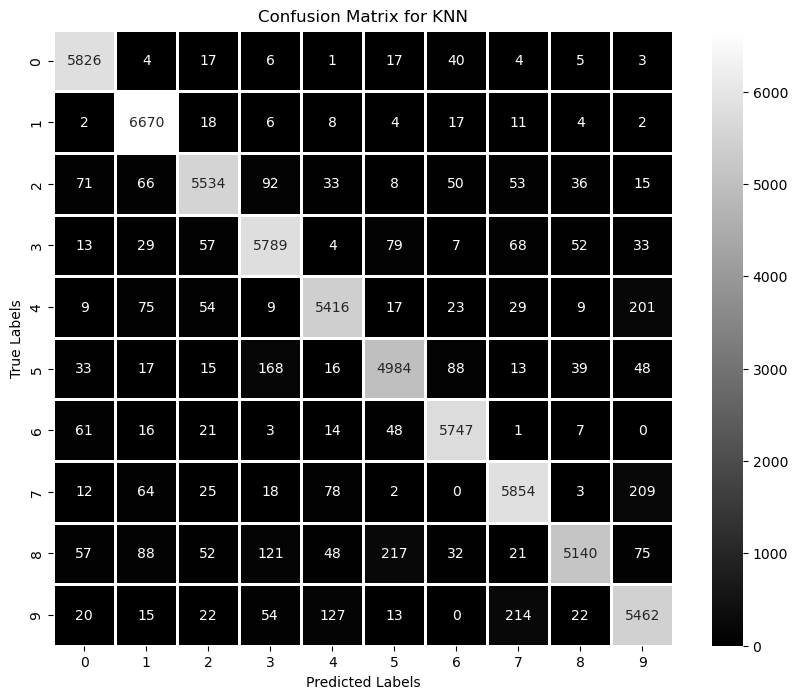

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

y_train_pred = cross_val_predict(knn_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)


plt.figure(figsize=(10, 8))
sns.heatmap(conf_mx, annot=True, fmt='g', cmap="gray", linewidths=1)
plt.title('Confusion Matrix for KNN')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [65]:
from sklearn.metrics import accuracy_score
knn_clf = KNeighborsClassifier(weights='distance', n_neighbors=4)
knn_clf.fit(X_train, y_train)
y_knn_pred = knn_clf.predict(X_test)
accuracy_score(y_test, y_knn_pred)

0.9714

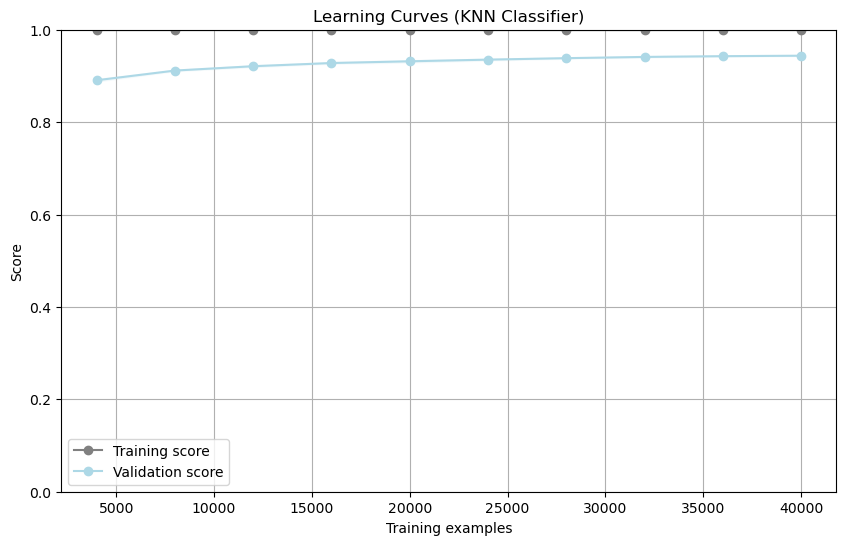

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))


# sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)

# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(knn_clf, X_train_scaled, y_train, cv=3,
                                                         n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate the mean and standard deviation for training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='GRAY', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='lightblue', label='Validation score')

# Plot the fill between the lines
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='gray')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='lightblue')

plt.title('Learning Curves (KNN Classifier)')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid()
plt.ylim(0, 1)
plt.show()

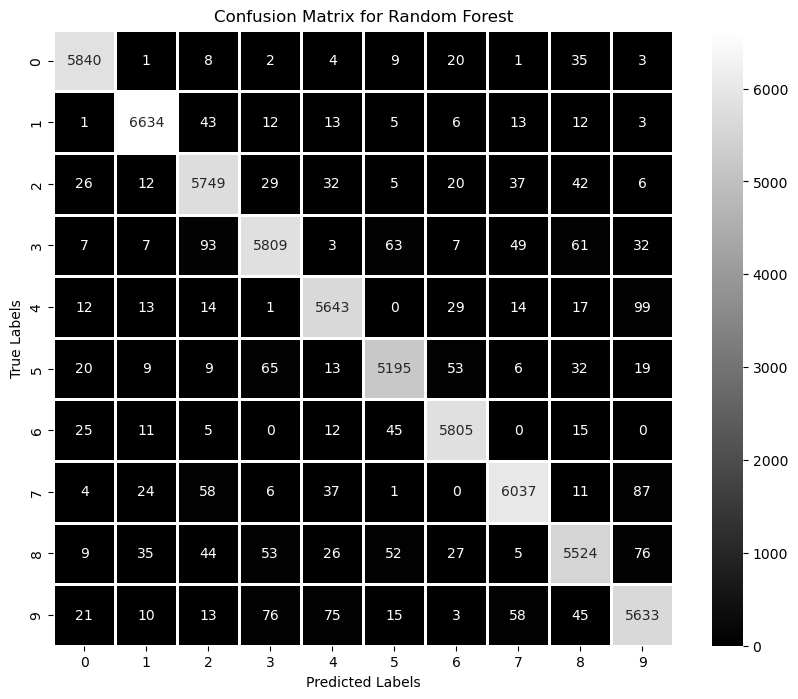

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

y_train_pred = cross_val_predict(forest_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)


plt.figure(figsize=(10, 8))
sns.heatmap(conf_mx, annot=True, fmt='g', cmap="gray", linewidths=1)
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

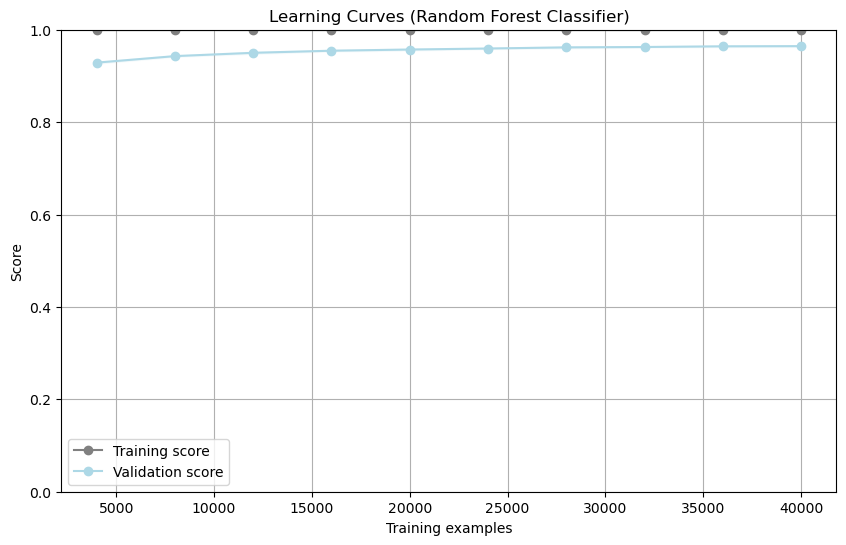

In [70]:
train_sizes, train_scores, test_scores = learning_curve(forest_clf, X_train_scaled, y_train, cv=3,
                                                         n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate the mean and standard deviation for training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='GRAY', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='lightblue', label='Validation score')

# Plot the fill between the lines
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='gray')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='lightblue')

plt.title('Learning Curves (Random Forest Classifier)')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid()
plt.ylim(0, 1)
plt.show()

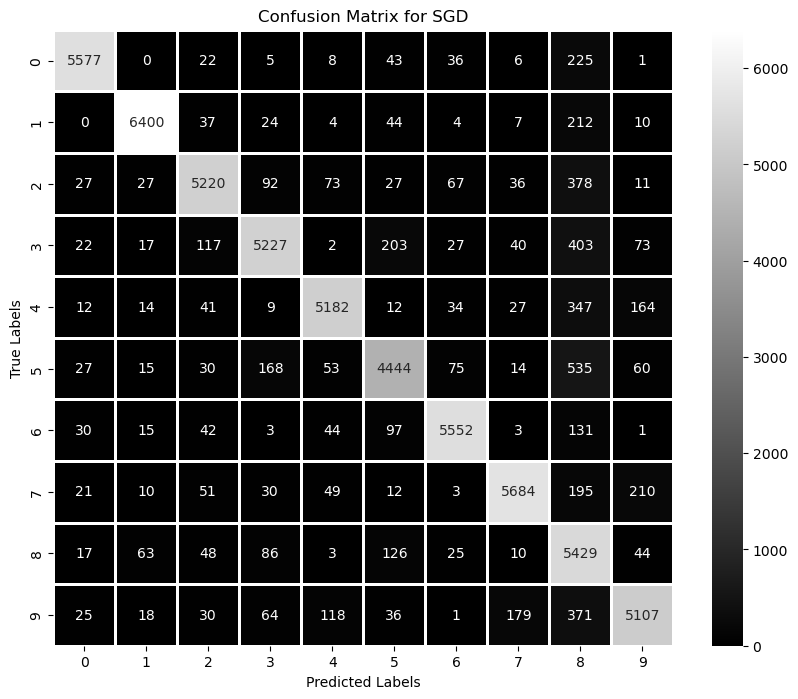

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)


plt.figure(figsize=(10, 8))
sns.heatmap(conf_mx, annot=True, fmt='g', cmap="gray", linewidths=1)
plt.title('Confusion Matrix for SGD')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

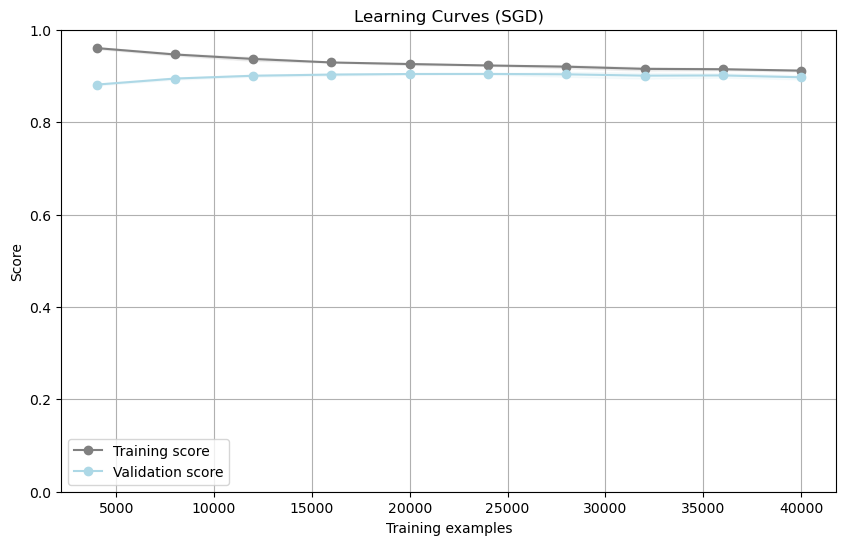

In [74]:
train_sizes, train_scores, test_scores = learning_curve(sgd_clf, X_train_scaled, y_train, cv=3,
                                                         n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate the mean and standard deviation for training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='GRAY', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='lightblue', label='Validation score')

# Plot the fill between the lines
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='gray')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='lightblue')

plt.title('Learning Curves (SGD)')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid()
plt.ylim(0, 1)
plt.show()

In [85]:
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_clf.fit(X_train_scaled, y_train)
y_train_pred = cross_val_predict(forest_clf, X_train_scaled, y_train, cv=3)
accuracy = accuracy_score(y_train, y_train_pred)
print(f"Accuracy of Random Forest Classifier: {accuracy:.4f}")

Accuracy of Random Forest Classifier: 0.9645


In [89]:
sdg_clf = SGDClassifier(random_state=42)
sdg_clf.fit(X_train_scaled, y_train)
y_train_pred = cross_val_predict(sdg_clf, X_train_scaled, y_train, cv=3)
accuracy = accuracy_score(y_train, y_train_pred)
print(f"Accuracy of SDG Classifier: {accuracy:.4f}")

Accuracy of SDG Classifier: 0.8970
